In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns

In [11]:
DIR = Path("salmon") / "io" / "2021-07-01-arr-search"

In [16]:
dfs = []
for n_search in ["1k", "10k", "100k", "3k", "30k", "300k"]:
    _df = pd.read_csv(DIR / f"n_search={n_search}" / "responses-16.csv")
    n_search_ = int(n_search.replace("k", "000"))
    _df["n_search"] = n_search_
    _df["log_n_search"] = np.log10(n_search_)
    _df["index"] = np.arange(len(_df))
    dfs.append(_df)
df = pd.concat(dfs)
df = df[df.score > -100]

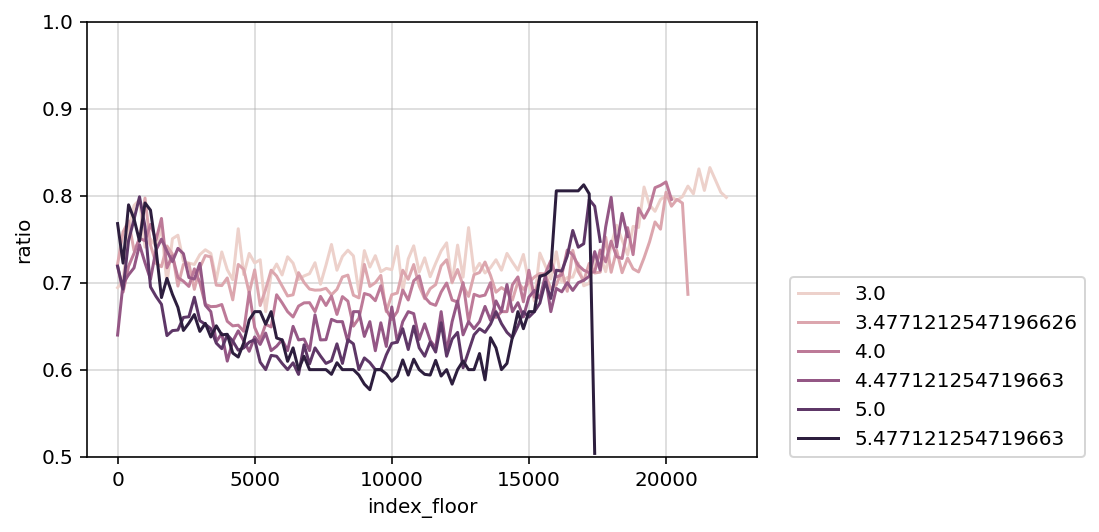

In [27]:
N = 200

dl = np.abs(df["head_filename"] - df["left_filename"])
dr = np.abs(df["head_filename"] - df["right_filename"])

df["ratio"] = np.maximum(dl, dr) / (dl + dr)
df["index_floor"] = (df["index"] / N).astype(int) * N

ax = sns.lineplot(
    x="index_floor",
    y="ratio",
    hue="log_n_search",
    estimator="median",
    data=df,
    ci=None,
)
ax.set_ylim(0.5, 1)
ax.legend(loc=(1.05, 0))
ax.grid(alpha=0.5)

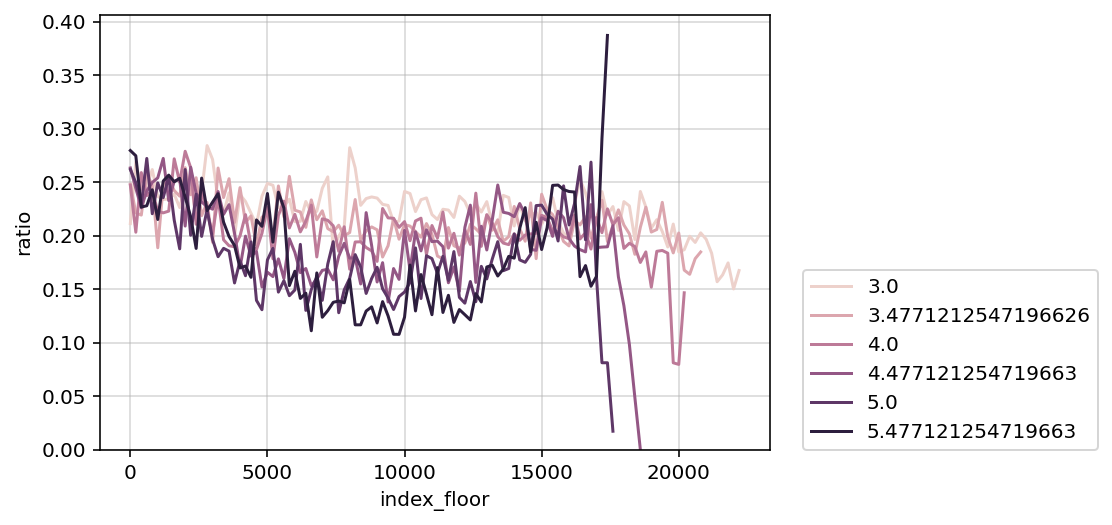

In [33]:
ax = sns.lineplot(
    x="index_floor",
    y="ratio",
    hue="log_n_search",
#     estimator="std",
    estimator=lambda x: np.percentile(x, 75) - np.percentile(x, 25),
    data=df,
    ci=None,
)
ax.set_ylim(0, None)
ax.legend(loc=(1.05, 0))
ax.grid(alpha=0.5)

In [24]:
df.groupby("n_search")["ratio"].std(

n_search
3         0.141129
10        0.141129
30        0.141129
100       0.141129
300       0.141129
1000      0.141128
3000      0.141129
10000     0.141129
30000     0.141129
100000    0.141129
300000    0.141129
Name: ratio, dtype: float64